In [164]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
%matplotlib inline

#Model Evaluation Tools
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

#Data processing Functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from tqdm import tqdm

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import lightgbm as lgb
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier,BaggingClassifier,RandomForestClassifier

# ANN Model Libraries
import tensorflow
import keras
import shap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical

#warnings
import warnings
warnings.filterwarnings('ignore') 

In [165]:
shap.initjs()

In [166]:
path = "D:/Csv Files/movie_metadata.csv"
df = pd.read_csv(path)
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [167]:
df.sample(20)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
3445,Color,Charles Robert Carner,35.0,97.0,18.0,742.0,Jenny McCarthy,834.0,4131640.0,Comedy|Crime,...,20.0,English,USA,PG-13,7500000.0,2008.0,749.0,3.1,1.85,140
3190,Color,John Putch,23.0,111.0,60.0,699.0,Diedrich Bader,823.0,3333823.0,Drama|Mystery|Sci-Fi,...,122.0,English,USA,PG-13,10000000.0,2012.0,759.0,5.5,2.35,0
4308,Color,Richard LaGravenese,81.0,94.0,98.0,89.0,Jeremy Jordan,10000.0,137945.0,Comedy|Drama|Musical|Romance,...,40.0,English,USA,PG-13,NaN,2014.0,773.0,5.9,2.35,0
1066,Color,Christopher Nolan,185.0,118.0,22000.0,319.0,Maura Tierney,14000.0,67263182.0,Drama|Mystery|Thriller,...,651.0,English,USA,R,46000000.0,2002.0,509.0,7.2,2.35,0
560,Color,Henry Selick,74.0,93.0,253.0,637.0,Bridget Fonda,3000.0,5409517.0,Animation|Comedy|Fantasy,...,171.0,English,USA,PG-13,75000000.0,2001.0,889.0,4.7,1.85,683
3321,Color,André Téchiné,66.0,105.0,25.0,98.0,Ronit Elkabetz,963.0,2874.0,Drama,...,14.0,French,France,Unrated,NaN,2009.0,168.0,6.0,2.35,120
3070,Color,Rowan Joffe,136.0,111.0,17.0,405.0,Sean Harris,845.0,NaN,Crime|Drama|Thriller,...,59.0,English,UK,R,12000000.0,2010.0,641.0,5.7,2.35,0
733,Color,Robert Schwentke,315.0,111.0,124.0,357.0,Morgan Freeman,13000.0,90356857.0,Action|Comedy|Crime|Thriller,...,328.0,English,USA,PG-13,58000000.0,2010.0,11000.0,7.1,2.35,32000
2537,Color,Joe Nussbaum,72.0,108.0,18.0,433.0,Matt Long,714.0,11702090.0,Comedy|Romance,...,50.0,English,USA,PG-13,16500000.0,2007.0,701.0,6.3,2.35,0
2835,Color,Darren Aronofsky,669.0,108.0,0.0,1000.0,Mila Kunis,20000.0,106952327.0,Drama|Thriller,...,1140.0,English,USA,R,13000000.0,2010.0,15000.0,8.0,2.35,106000


In [168]:
df.shape

(5043, 28)

In [169]:
df.dtypes


color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [170]:
df.genres[7]

'Adventure|Animation|Comedy|Family|Fantasy|Musical|Romance'

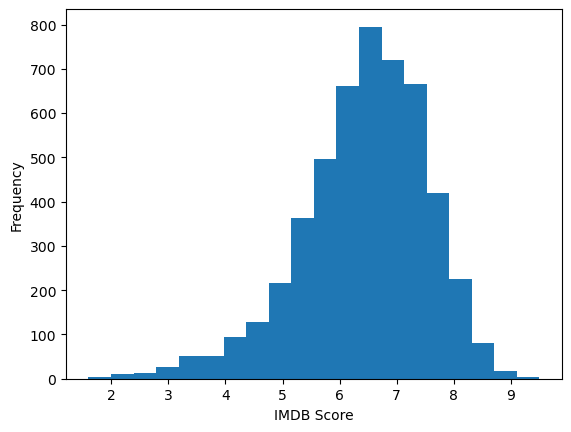

In [171]:
serial_numbers = list(range(len(df)))
plt.hist(df["imdb_score"], bins=20)
plt.xlabel("IMDB Score")
plt.ylabel("Frequency")
# show the plot
plt.show()

**From the above histogram we can see that many movies are in the range of 5.5 to 7.5 of imdb_score** 

In [172]:
bins = [ 1, 5.3, 7.4, 10]
labels = ['FLOP', 'AVG', 'HIT']
df['imdb_binned'] = pd.cut(df['imdb_score'], bins=bins, labels=labels)
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,imdb_binned
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,HIT
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,AVG
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,AVG
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,HIT
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,AVG


In [173]:
counts = df['imdb_binned'].value_counts()
print(counts)

AVG     3401
HIT      887
FLOP     755
Name: imdb_binned, dtype: int64


In [174]:
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
imdb_binned                    0
dtype: int64

In [175]:
df.dropna(inplace=True)
print(df.shape)
df.head()

(3756, 29)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,imdb_binned
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,HIT
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,AVG
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,AVG
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,HIT
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,AVG


In [176]:
df.describe(include='object')

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
count,3756,3756,3756,3756,3756,3756,3756,3756,3756,3756,3756,3756
unique,2,1659,2188,745,1428,3655,2587,3656,3656,34,45,12
top,Color,Steven Spielberg,Morgan Freeman,Comedy|Drama|Romance,Robert De Niro,Home,Steve Coogan,alien friendship|alien invasion|australia|flyi...,http://www.imdb.com/title/tt2224026/?ref_=fn_t...,English,USA,R
freq,3632,25,20,147,42,3,8,3,3,3598,2987,1700


In [177]:
df.drop(columns=['movie_title','movie_imdb_link'],inplace=True)
df2 = df.copy(deep=True)
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,imdb_binned
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,HIT
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,AVG
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,AVG
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,HIT
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,AVG


In [178]:
cat_list=['color', 'director_name', 'actor_2_name',
        'genres', 'actor_1_name',
        'actor_3_name',
        'plot_keywords',
        'language', 'country', 'content_rating',
       'title_year', 'aspect_ratio']
df[cat_list]=df[cat_list].apply(lambda x:le.fit_transform(x))
df.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,imdb_binned
0,1,620,723.0,178.0,0.0,855.0,1002,1000.0,760505847.0,91,...,9,43,7,237000000.0,66,936.0,7.9,7,33000,HIT
1,1,538,302.0,169.0,563.0,1000.0,1592,40000.0,309404152.0,85,...,9,43,7,300000000.0,64,5000.0,7.1,12,0,AVG
2,1,1395,602.0,148.0,0.0,161.0,1795,11000.0,200074175.0,107,...,9,42,7,245000000.0,72,393.0,6.8,12,85000,AVG
3,1,251,813.0,164.0,22000.0,23000.0,381,27000.0,448130642.0,243,...,9,43,7,250000000.0,69,23000.0,8.5,12,164000,HIT
5,1,62,462.0,132.0,475.0,530.0,1837,640.0,73058679.0,105,...,9,43,7,263700000.0,69,632.0,6.6,12,24000,AVG
6,1,1398,392.0,156.0,0.0,4000.0,880,24000.0,336530303.0,101,...,9,43,7,258000000.0,64,11000.0,6.2,12,0,AVG
7,1,1125,324.0,100.0,15.0,284.0,578,799.0,200807262.0,262,...,9,43,6,260000000.0,67,553.0,7.8,8,29000,HIT
8,1,839,635.0,141.0,0.0,19000.0,1758,26000.0,458991599.0,105,...,9,43,7,250000000.0,72,21000.0,7.5,12,118000,HIT
9,1,364,375.0,153.0,282.0,10000.0,469,25000.0,301956980.0,371,...,9,42,6,250000000.0,66,11000.0,7.5,12,10000,HIT
10,1,1654,673.0,183.0,0.0,2000.0,1222,15000.0,330249062.0,105,...,9,43,7,250000000.0,73,4000.0,6.9,12,197000,AVG


<Axes: >

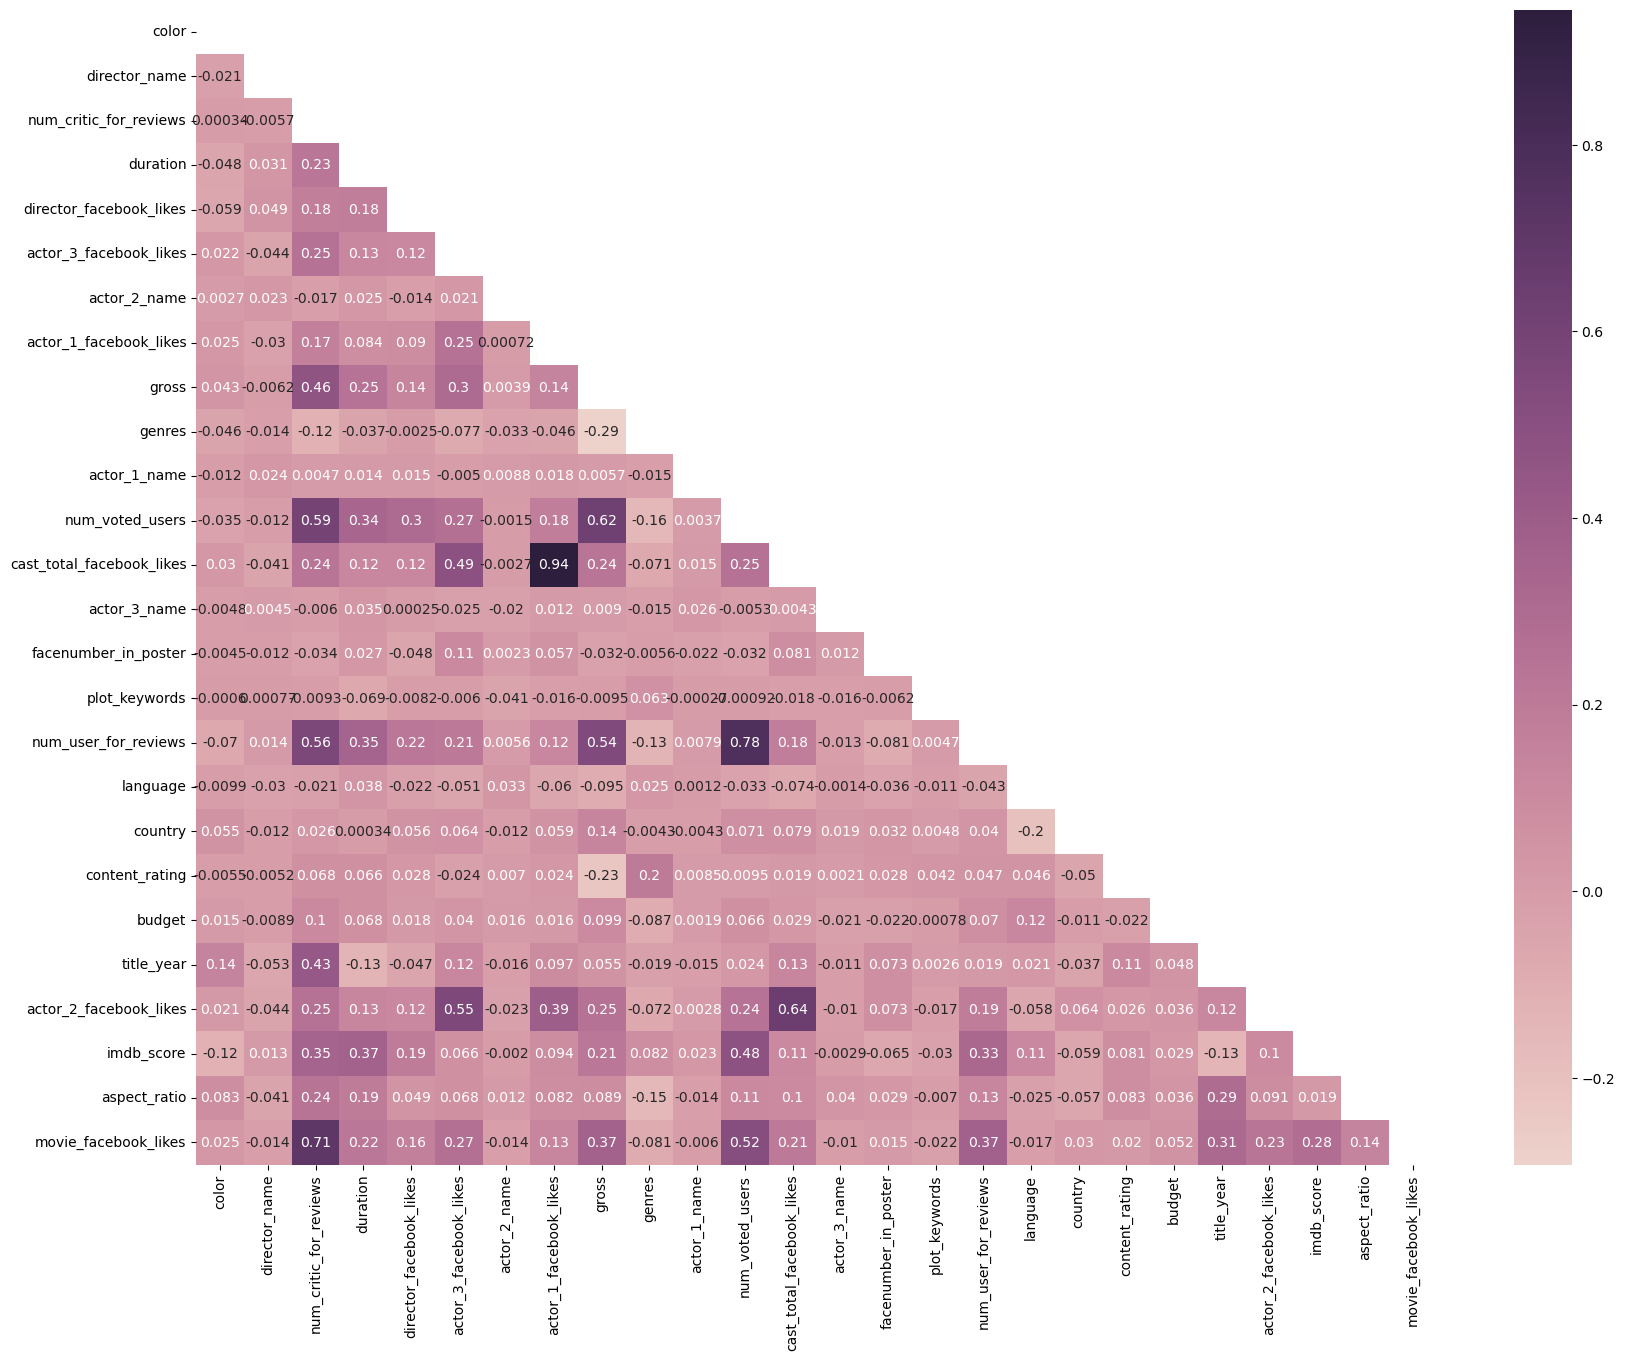

In [179]:
corr = df.corr()
mask = np.zeros(corr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
plt.subplots(figsize=(20,15))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,cmap=sns.cubehelix_palette(as_cmap=True),annot=True,mask = mask)

In [180]:
df.describe()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3.756000e+03,3756.000000,...,3756.000000,3756.000000,3756.000000,3756.000000,3.756000e+03,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000
mean,0.966986,858.290202,167.378328,110.257987,807.336528,771.279553,1090.030618,7751.338658,5.261282e+07,446.816560,...,336.843184,9.353301,39.658679,7.586528,4.623685e+07,60.015442,2021.775825,6.465282,9.988285,9353.829340
std,0.178696,484.588350,123.452040,22.646717,3068.171683,1894.249869,638.211500,15519.339621,7.031787e+07,215.946526,...,411.227368,2.434668,9.484312,1.683861,2.260103e+08,9.651188,4544.908236,1.056247,2.370451,21462.889123
min,0.000000,0.000000,2.000000,37.000000,0.000000,0.000000,0.000000,0.000000,1.620000e+02,0.000000,...,4.000000,0.000000,0.000000,0.000000,2.180000e+02,0.000000,0.000000,1.600000,0.000000,0.000000
25%,1.000000,442.000000,77.000000,96.000000,11.000000,194.000000,535.000000,745.000000,8.270233e+06,243.000000,...,110.000000,9.000000,43.000000,7.000000,1.000000e+07,56.000000,384.750000,5.900000,8.000000,0.000000
50%,1.000000,872.000000,138.500000,106.000000,64.000000,436.000000,1080.500000,1000.000000,3.009311e+07,507.000000,...,210.000000,9.000000,43.000000,7.000000,2.500000e+07,61.000000,685.500000,6.600000,12.000000,227.000000
75%,1.000000,1298.250000,224.000000,120.000000,235.000000,691.000000,1646.000000,13000.000000,6.688194e+07,625.000000,...,398.250000,9.000000,43.000000,9.000000,5.000000e+07,67.000000,976.000000,7.200000,12.000000,11000.000000
max,1.000000,1658.000000,813.000000,330.000000,23000.000000,23000.000000,2187.000000,640000.000000,7.605058e+08,744.000000,...,5060.000000,33.000000,44.000000,11.000000,1.221550e+10,73.000000,137000.000000,9.300000,17.000000,349000.000000


I will remove columns which are causing multicollinearity such as cast_total_facebook_likes and num_critic_for_reviews as Multicollinearity reduces the precision of the estimated coefficients, which weakens the statistical power of your regression model. You might not be able to trust the p-values to identify independent variables that are statistically significant.

In [181]:
df.drop(columns=['cast_total_facebook_likes','num_critic_for_reviews',],inplace=True)
df2.drop(columns=['cast_total_facebook_likes','num_critic_for_reviews',],inplace=True)

In [182]:
#Removing the column "imdb_score" since we have "imdb_binned"
df.drop(columns=['imdb_score'],inplace=True)

In [183]:
df.shape

(3756, 24)

In [184]:
df.head()

,color,director_name,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,imdb_binned
0,1,620,178.0,0.0,855.0,1002,1000.0,760505847.0,91,189,...,3054.0,9,43,7,237000000.0,66,936.0,7,33000,HIT
1,1,538,169.0,563.0,1000.0,1592,40000.0,309404152.0,85,687,...,1238.0,9,43,7,300000000.0,64,5000.0,12,0,AVG
2,1,1395,148.0,0.0,161.0,1795,11000.0,200074175.0,107,258,...,994.0,9,42,7,245000000.0,72,393.0,12,85000,AVG
3,1,251,164.0,22000.0,23000.0,381,27000.0,448130642.0,243,1340,...,2701.0,9,43,7,250000000.0,69,23000.0,12,164000,HIT
5,1,62,132.0,475.0,530.0,1837,640.0,73058679.0,105,323,...,738.0,9,43,7,263700000.0,69,632.0,12,24000,AVG


### Model building

In [185]:
X = df.drop(['imdb_binned'],axis = 1)
y = df['imdb_binned']
y.sample(10)

716      HIT
2058     HIT
1238     AVG
2049     AVG
3200    FLOP
4922     HIT
1897     AVG
1882     AVG
4691     AVG
1965    FLOP
Name: imdb_binned, dtype: category
Categories (3, object): ['FLOP' < 'AVG' < 'HIT']

In [186]:
y1 = le.fit_transform(y)
Y = pd.get_dummies(y1).values
print(Y)

[[0 0 1]
 [1 0 0]
 [1 0 0]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [187]:
#Spliting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0,stratify = y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2629, 23)
(2629, 3)
(1127, 23)
(1127, 3)


In [188]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

### Model Creation


In [189]:
model = Sequential()
model.add(Dense(64,activation = 'relu',input_shape =(23,)))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(3,activation = 'softmax'))

optimizer = Adam(lr=0.001)
model.compile(optimizer = optimizer,loss ='categorical_crossentropy',metrics =['accuracy'])

In [190]:
history = model.fit(X_train_scaled,y_train,epochs = 60,batch_size = 32,verbose =1)

Epoch 1/60
83/83 [==============================] - 1s 4ms/step - loss: 0.8044 - accuracy: 0.6889
Epoch 2/60
83/83 [==============================] - 0s 4ms/step - loss: 0.6454 - accuracy: 0.7531
Epoch 3/60
83/83 [==============================] - 0s 4ms/step - loss: 0.5997 - accuracy: 0.7607
Epoch 4/60
83/83 [==============================] - 0s 4ms/step - loss: 0.5731 - accuracy: 0.7695
Epoch 5/60
83/83 [==============================] - 0s 4ms/step - loss: 0.5523 - accuracy: 0.7722
Epoch 6/60
83/83 [==============================] - 0s 4ms/step - loss: 0.5308 - accuracy: 0.7817
Epoch 7/60
83/83 [==============================] - 0s 4ms/step - loss: 0.5188 - accuracy: 0.7820
Epoch 8/60
83/83 [==============================] - 0s 4ms/step - loss: 0.5048 - accuracy: 0.7878
Epoch 9/60
83/83 [==============================] - 0s 4ms/step - loss: 0.4893 - accuracy: 0.7957
Epoch 10/60
83/83 [==============================] - 0s 4ms/step - loss: 0.4785 - accuracy: 0.8030
Epoch 11/60
83/83 [

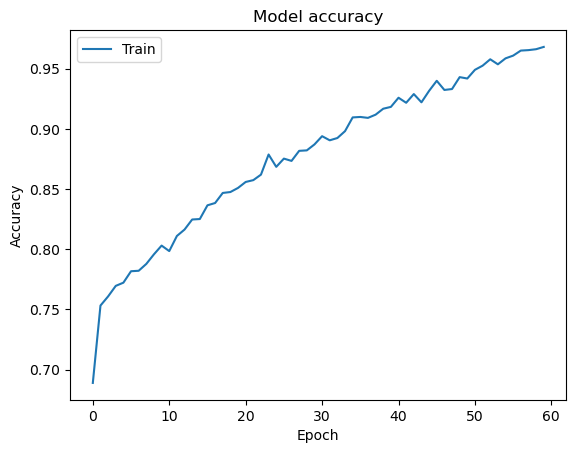

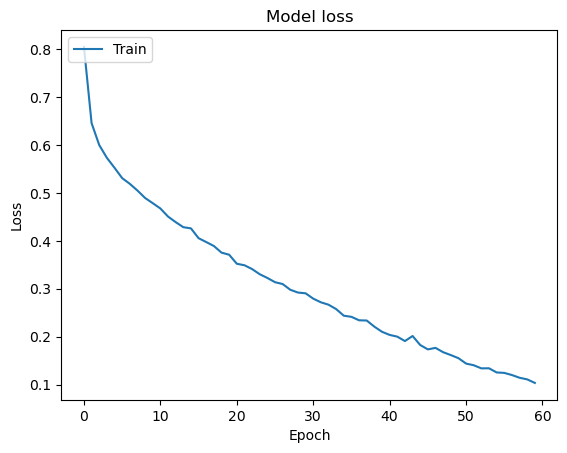

In [191]:
# Plot training accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**SHAP expects model functions to take a 2D numpy array as input, so we define a wrapper function around the original Keras predict function.**

In [192]:
#def predictor(X):
#    return model.predict([X[:,i] for i in range(X.shape[1])]).flatten()
y_pred = model.predict(X_test_scaled)
y_test_class = np.argmax(y_test,axis = 1)
y_pred_class = np.argmax(y_pred,axis = 1)

36/36 [==============================] - 0s 2ms/step


              precision    recall  f1-score   support

           0       0.80      0.88      0.84       788
           1       0.49      0.38      0.43       149
           2       0.73      0.56      0.63       190

    accuracy                           0.76      1127
   macro avg       0.67      0.61      0.63      1127
weighted avg       0.75      0.76      0.75      1127



<Axes: >

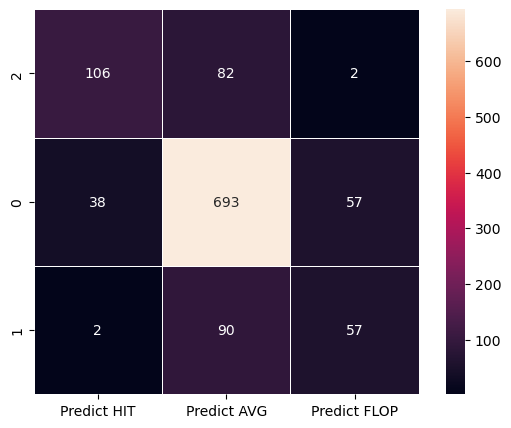

In [193]:
print(classification_report(y_test_class,y_pred_class))

cm = confusion_matrix(y_test_class,y_pred_class,labels = [2,0,1])
df_cm = pd.DataFrame(cm,index=[i for i in [2,0,1]],columns = [i for i in["Predict HIT","Predict AVG","Predict FLOP"]])
plt.figure(figsize=(7,5))
sns.heatmap(data=df_cm,linewidths=.5, annot=True,square = True,fmt = 'g')

**Explaining single prediction**

**To estimate SHAP values, we need to perturb the input features and observe how the model's output changes. However, we can't perturb every possible combination of feature values because that would be computationally expensive. Instead, we use a subset of the data to represent "typical" feature values.
In this case, the authors of the method used 50 samples from the dataset to represent typical feature values. These samples are used to create perturbations for estimating SHAP values. Specifically, they generate 500 perturbations per sample, resulting in a total of 500 * 50 = 25,000 perturbations.
For each perturbation, the model is evaluated to obtain the output prediction. The difference between the perturbed feature values and the original feature values is used to estimate the contribution of each feature to the model's output, which is the SHAP value.
This method is computationally expensive because it requires 500 * 50 evaluations of the model. However, it provides a more accurate estimate of the SHAP values than other methods that use fewer samples or perturbations.**

In [194]:
dummy_data = np.random.rand(1, 23)
print(dummy_data)
y_pred1 = model.predict(dummy_data)
print(y_pred1[0][0])
print(y_pred1[0][1])
print(y_pred1[0][2])

[[0.76486202 0.51597266 0.32257776 0.85810813 0.09138499 0.51870603
  0.07198527 0.59260887 0.65733803 0.40286228 0.03250919 0.19268446
  0.25008813 0.21669831 0.29389704 0.45369178 0.01209083 0.18952067
  0.41851841 0.90296914 0.68293523 0.07796422 0.62023627]]
1/1 [==============================] - 0s 19ms/step
0.9940895
0.0009493599
0.0049611675


In [195]:
target_cols = ['imdb_binned'] 
column_names = list(df.drop(columns=target_cols).columns)
print(column_names)

['color', 'director_name', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name', 'num_voted_users', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'num_user_for_reviews', 'language', 'country', 'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes', 'aspect_ratio', 'movie_facebook_likes']


In [196]:
print(X_test_scaled[100])
dummy_data = X_test_scaled[100]
dummy_data = np.reshape(dummy_data, (1, -1))
y_pred1 = model.predict(dummy_data)
print(y_pred1[0][0])
print(y_pred1[0][1])
print(y_pred1[0][2])

[ 0.17829649 -0.85152821 -0.23972137 -0.26781992  0.0555103  -0.82939229
  0.84572816 -0.37283988 -1.17563229  1.06251004  0.39014965 -1.19449007
 -0.18769561  1.64844452  0.12587412 -0.15163828  0.353887    0.84303904
 -0.1438688   0.73264591 -0.23473945 -0.8634959   1.55461991]
1/1 [==============================] - 0s 20ms/step
0.99493366
1.0635546e-08
0.0050663976


In [197]:
explainer = shap.KernelExplainer(model.predict,X[:100])
shap_values = explainer.shap_values(X_test_scaled[100,:])

6544/6544 [==============================] - 10s 2ms/step


In [198]:
shap_values

[array([-0.02221103, -0.00504844,  0.0507545 ,  0.        , -0.02054516,
         0.08179733, -0.06583172, -0.3117155 ,  0.03891016, -0.0210262 ,
         0.15283869, -0.03330973,  0.00862932,  0.01694812,  0.11113785,
         0.03934806,  0.06281517, -0.01993609, -0.32550331,  0.05889789,
         0.05031324,  0.00636234,  0.14130817]),
 array([ 0.00790113,  0.01580886,  0.01659766,  0.        ,  0.00996183,
        -0.08973374,  0.03602043,  0.04760649, -0.04617852,  0.02515596,
         0.04838702,  0.02345166,  0.        ,  0.        , -0.10762402,
         0.01296613, -0.05654098,  0.01297282,  0.04141876, -0.06632957,
         0.04359423,  0.        ,  0.02456385]),
 array([ 0.        ,  0.        , -0.06599239,  0.        ,  0.        ,
         0.        ,  0.03225866,  0.26583818,  0.        ,  0.        ,
        -0.20098921,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.05132282,  0.        ,  0.        ,  0.28522284,  0.        ,
        -0.09461564,  0.  

In [199]:
dummy_data = X_test_scaled[100]
dummy_data = np.reshape(dummy_data, (1, -1))
y_pred1 = model.predict(dummy_data)
print("\nModel's Prediction")
print(y_pred1)
print("\nExplanatory model prediction")
print((explainer.fnull+np.sum(shap_values)))
print("\nActual Value")
print(y_test[100])


1/1 [==============================] - 0s 20ms/step

Model's Prediction
[[9.9493366e-01 1.0635546e-08 5.0663976e-03]]

Explanatory model prediction
[1.00000007e+00 7.30341578e-08 7.30341578e-08]

Actual Value
[1 0 0]


**We can see that for that sample we took from X_test our model gave the some output saying its Average and then when we see the explanatory model prediction even that says Average**

In [209]:
shap.plots.force(explainer.expected_value[1],shap_values[1],column_names)

In [208]:
shap.plots.force(explainer.expected_value[0],shap_values[0],column_names)

In [210]:
shap.plots.force(explainer.expected_value[2],shap_values[2],column_names)

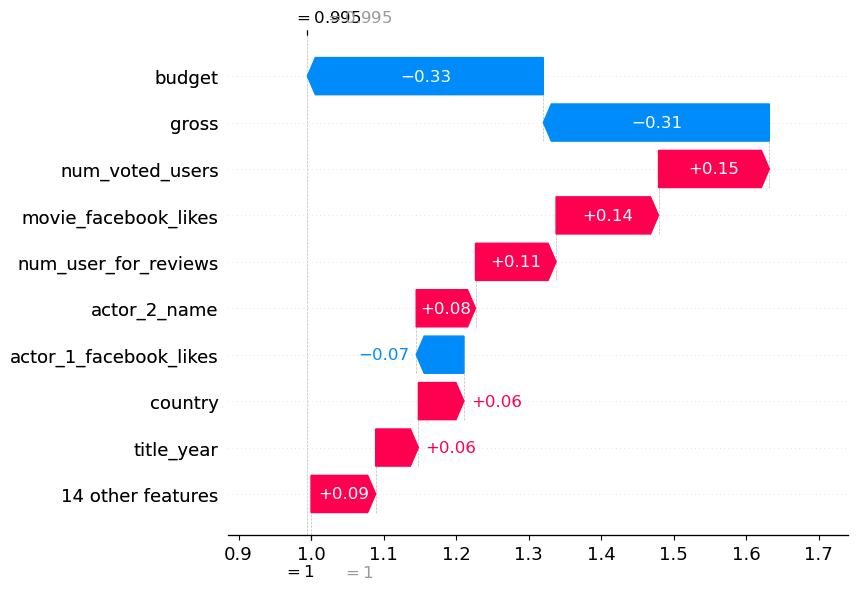

In [213]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0], shap_values[0], feature_names = column_names)

In [52]:
shap_values50 = explainer.shap_values(X_train_scaled[450:500,:],nsamples = 500)

  0%|          | 0/50 [00:00<?, ?it/s]

1563/1563 [==============================] - 2s 1ms/step


**Explaination for AVG**

In [53]:
shap.force_plot(explainer.expected_value[0],shap_values50[0],column_names)

**Explanation for FLOP**

In [54]:
shap.force_plot(explainer.expected_value[1],shap_values50[1],column_names)

**Explanation for HIT**

In [55]:
shap.force_plot(explainer.expected_value[2],shap_values50[2],column_names)

## Deep Explainer

In [56]:
explainer = shap.DeepExplainer(model, X_train_scaled)
shap_values = explainer.shap_values(X_test_scaled)

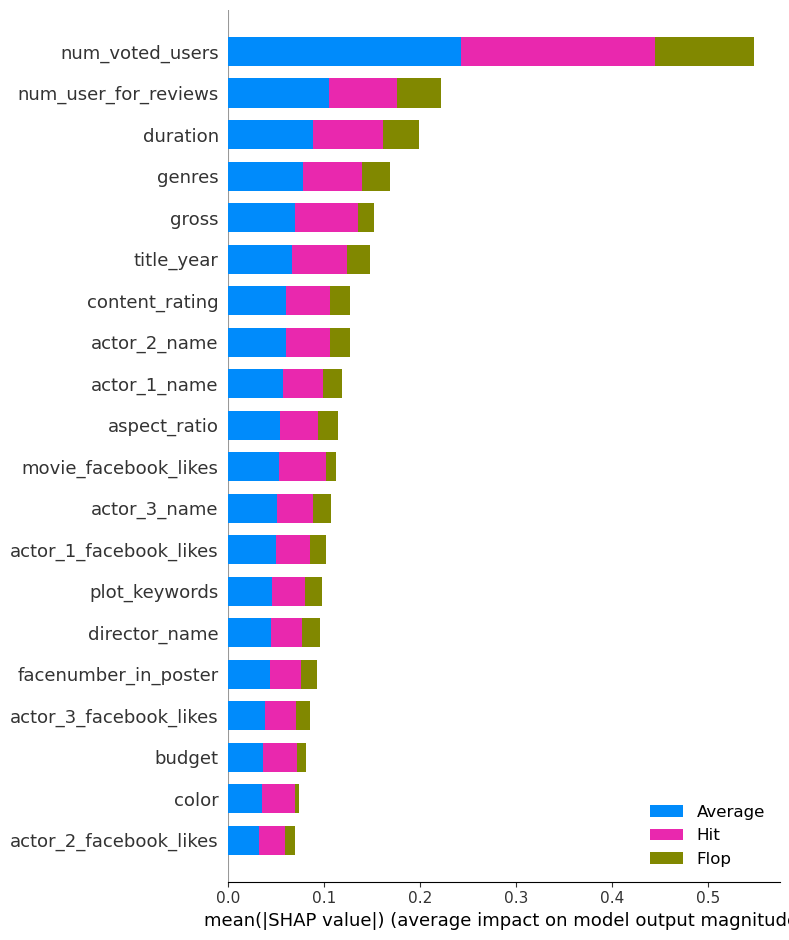

In [57]:
shap.summary_plot(shap_values, plot_type = 'bar', feature_names = column_names,class_names=['Average','Flop','Hit'])

In [116]:
top5 = ['num_voted_users','num_user_for_reviews','duration','genres','gross','title_year','content_rating','actor_2_name','actor_1_name','aspect_ratio','movie_facebook_likes','actor_3_name','actor_1_facebook_likes','director_name','budget']
len(top5)

15

In [124]:
X_train_selected = X_train[top5]
X_test_selected = X_test[top5]
X_train_selected.shape

(2629, 15)

In [125]:
X_train_scaled2 = sc.fit_transform(X_train_selected)
X_test_scaled2 = sc.transform(X_test_selected)

In [126]:
model2 = keras.Sequential()
model2.add(Dense(128,activation = 'relu',input_shape =(15,)))
model2.add(Dense(64,activation = 'relu'))
model2.add(Dense(32,activation = 'relu'))
model2.add(Dense(32,activation = 'relu'))
model2.add(Dense(16,activation = 'relu'))
model2.add(Dense(3,activation = 'softmax'))
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [127]:
history2 = model2.fit(X_train_scaled2, y_train, epochs=60,batch_size=32)

Epoch 1/60
83/83 [==============================] - 1s 4ms/step - loss: 0.8752 - accuracy: 0.6383
Epoch 2/60
83/83 [==============================] - 0s 5ms/step - loss: 0.6561 - accuracy: 0.7566
Epoch 3/60
83/83 [==============================] - 0s 4ms/step - loss: 0.6070 - accuracy: 0.7634
Epoch 4/60
83/83 [==============================] - 0s 4ms/step - loss: 0.5693 - accuracy: 0.7710
Epoch 5/60
83/83 [==============================] - 0s 4ms/step - loss: 0.5565 - accuracy: 0.7733
Epoch 6/60
83/83 [==============================] - 0s 4ms/step - loss: 0.5339 - accuracy: 0.7756
Epoch 7/60
83/83 [==============================] - 0s 4ms/step - loss: 0.5161 - accuracy: 0.7836
Epoch 8/60
83/83 [==============================] - 0s 4ms/step - loss: 0.4994 - accuracy: 0.7820
Epoch 9/60
83/83 [==============================] - 0s 4ms/step - loss: 0.4928 - accuracy: 0.7965
Epoch 10/60
83/83 [==============================] - 0s 4ms/step - loss: 0.4877 - accuracy: 0.7957
Epoch 11/60
83/83 [

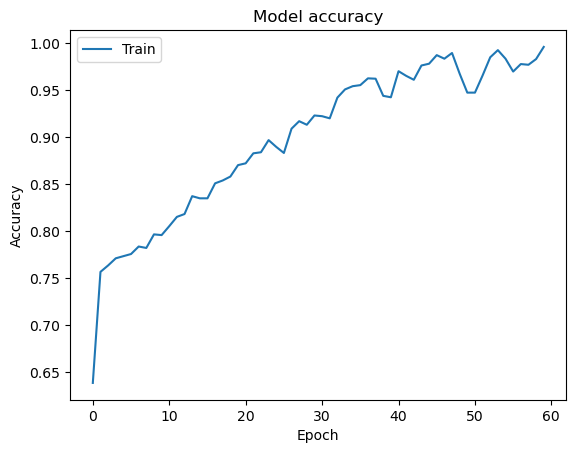

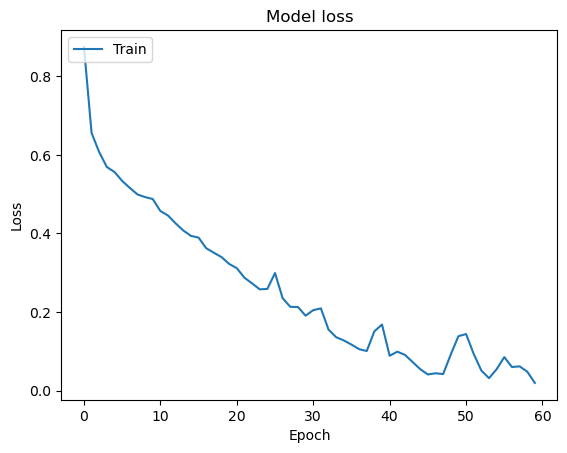

In [128]:
# Plot training accuracy values
plt.plot(history2.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training loss values
plt.plot(history2.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [131]:
y_pred2 = model2.predict(X_test_scaled2)
y_test_class2 = np.argmax(y_test,axis = 1)
y_pred_class2 = np.argmax(y_pred2,axis = 1)

36/36 [==============================] - 0s 2ms/step


              precision    recall  f1-score   support

           0       0.80      0.86      0.83       788
           1       0.43      0.30      0.35       149
           2       0.66      0.60      0.63       190

    accuracy                           0.74      1127
   macro avg       0.63      0.59      0.60      1127
weighted avg       0.72      0.74      0.73      1127



<Axes: >

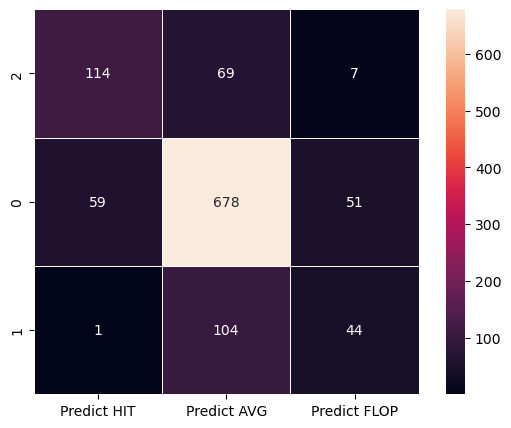

In [132]:
print(classification_report(y_test_class2,y_pred_class2))

cm = confusion_matrix(y_test_class2,y_pred_class2,labels = [2,0,1])
df_cm = pd.DataFrame(cm,index=[i for i in [2,0,1]],columns = [i for i in["Predict HIT","Predict AVG","Predict FLOP"]])
plt.figure(figsize=(7,5))
sns.heatmap(data=df_cm,linewidths=.5, annot=True,square = True,fmt = 'g')